# Potential Outcomes and DiD

[Data Literacy](./index.html)

Daniel Winkler ([Institute for Retailing & Data
Science](https://www.wu.ac.at/retail/))

# Motivation: Difference-in-Differences

## Basic Setup

-   Two groups
    -   Countries
    -   Companies
    -   Individuals
    -   etc.
-   Two periods
-   Group $g=2$ receives treatment between period $1$ and $2$
-   Group $g=\infty$ never receives the treatment (at least in the
    observation period)
-   No randomization but: “Quasi-Experiment”, “Natural Experiment”

. . .

-   **Goal**: identification of a *causal average treatment effect on
    the treated* (ATT)
-   **Core Assumption**: parallel trends

## Basic Setup


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

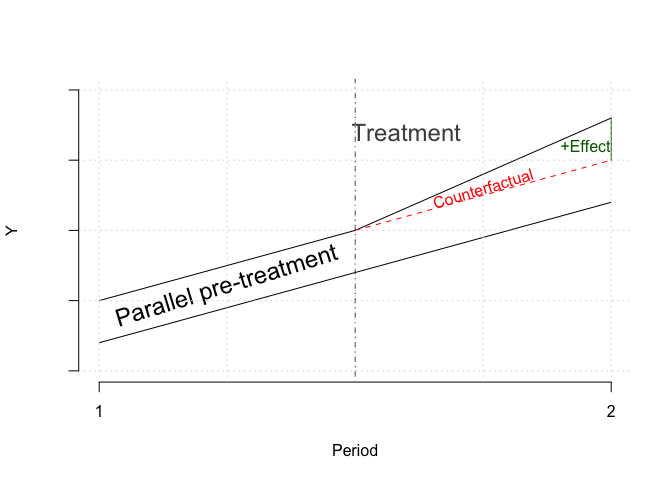

In [ ]:
library(dplyr)

## Treatment effect

-   $Y_{i,t}$ … outcome of unit $i$ at time $t$

### Potential outcomes (Rubin 2005)

-   $Y_{i,t}(0)$ … $Y_{i,t}$ given $i$ is **not** treated at $t$
-   $Y_{i,t}(1)$ … $Y_{i,t}$ give $i$ is treated at $t$
-   Observed:
    $Y_{i,t} = \mathbb{1}(treated_{i,t}) Y_{i,t}(1) + \left[1 - \mathbb{1}(treated_{i,t})\right] Y_{i,t}(0)$
-   Individual treatment effect: $\tau_{i,t} = Y_{i,t}(1) - Y_{i,t}(0)$

## Treatment effect

-   $Y_{i,t}$ … outcome of unit $i$ at time $t$

### Potential outcomes (Rubin 2005)

-   $Y_{i,t}(0)$ … $Y_{i,t}$ given $i$ is not treated at $t$
-   $Y_{i,t}(1)$ … $Y_{i,t}$ give $i$ is treated at $t$
-   Observed:
    $Y_{i,t} = \mathbb{1}(treated_{i,t}) Y_{i,t}(1) + \left[1 - \mathbb{1}(treated_{i,t})\right] Y_{i,t}(0)$
-   Individual treatment effect: $\tau_{i,t} = Y_{i,t}(1) - Y_{i,t}(0)$

|    Group     |    t = 1     |     t = 2     |
|:------------:|:------------:|:-------------:|
|   $g = 2$    | $Y_{i,1}(0)$ | $Y_{i, 2}(1)$ |
| $g = \infty$ | $Y_{j,1}(0)$ | $Y_{j, 2}(0)$ |

## Average Treatment Effect on the Treated ($\tau_{g=2}$)

-   $\bar Y_{g=k, t}$… average outcome of group $k$ at time $t$
-   $\delta_{g=\cdot}$… trend of the outcome for $g = \cdot$
-   $\delta_{g=\cdot} = \delta$ for $g = 2$ and $g = \infty$ under
    parallel trends

. . .

$$
\begin{aligned}
\bar Y_{g=2, 2} - \bar Y_{g=2, 1} &= \delta_{g=2} + \tau_{g=2} \\
\bar Y_{g=2, 2} - \bar Y_{g=2, 1} &=  \bar Y_{g=\infty, 2} - \bar Y_{g=\infty, 1} + \tau_{g=2} \\
\left[\bar Y_{g=2, 2} - \bar Y_{g=2, 1}\right] - \left[\bar Y_{g=\infty, 2} - \bar Y_{g=\infty, 1}\right] &= \tau_{g=2}
\end{aligned}
$$

## Introductory example

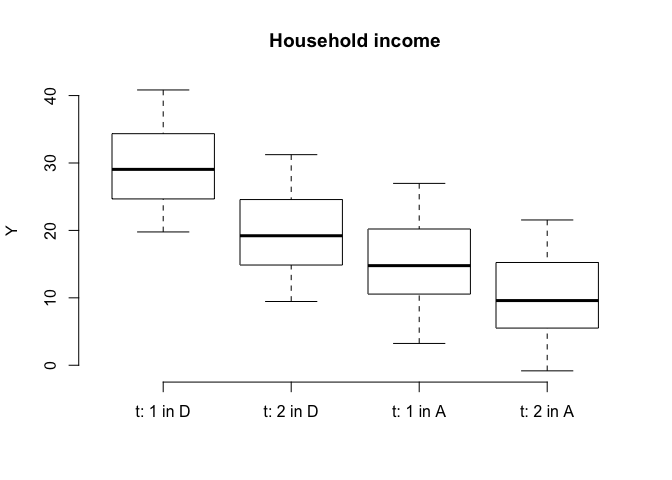

In [ ]:
set.seed(1)
n_obs <- 1000
units <- rep(1:(n_obs/2), each = 2)
unit_fe <- runif(n_obs/2, 0, 20)
period <- rep(c(0,1), n_obs/2)
period_fe <- rep(c(20, 10), n_obs/2)
treatment <- rbinom(n_obs/2, 1, 0.5)
y <- 5 * treatment[units] * period + # tau = 5
    period_fe + # time fixed effect
    unit_fe[units] - # unit fixed effect
    15 * treatment[units] + # constant diff treated/untreated
    rnorm(n_obs)
data <- data.frame(
    y = y, 
    treated = treatment[units], 
    period = period, 
    unit = as.factor(units))
y_j <- aggregate(y ~ period, data[data$treated == 1, ], mean)$y
y_k <- aggregate(y ~ period, data[data$treated == 0, ], mean)$y
delta_y_k <- diff(y_k)
y_k <- c(
    y_k[1],
    y_k[1] + delta_y_k/2,
    y_k[1] + delta_y_k)
y_j <- c(
    y_j[1],
    y_j[1] + delta_y_k/2, # assumed
    y_j[2])
y_j_counter <- c(
    y_j[1], 
    y_j[1] + delta_y_k/2,
    y_j[1] + delta_y_k) # assumed
boxplot(
    y ~ 
    factor(
        period, levels = c(0,1),
        labels = c("t: 1","t: 2")
        ) +
    factor(
        treated, levels = c(0,1), 
        labels = c("D", "A")
        ), 
    xlab = "", ylab = "Y",
    frame.plot = F,
    col = "white", sep = " in ",
    main = "Household income",
    data)

## Introductory example

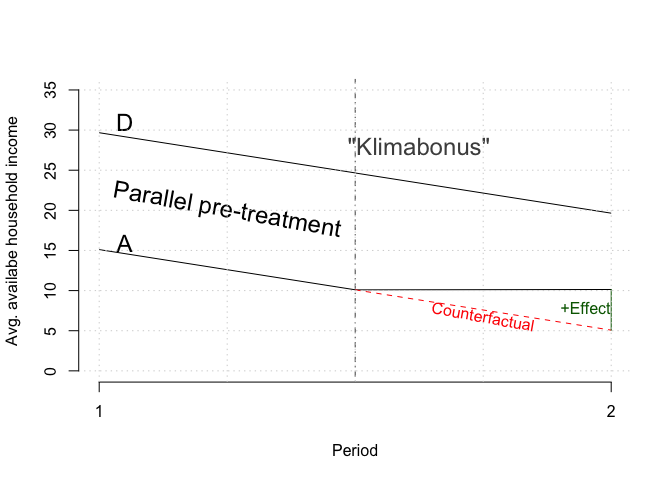

In [ ]:
plot(
    x, y_k, 
    type = "l", 
    ylim = c(0, 35),
    xaxt = "n", #yaxt = "n",
    ylab = "Avg. availabe household income", xlab = "Period", 
    bty= "n"
    )
axis(side=1, at=c(1,3), labels=c("1",  "2"))
lines(x, y_j)
lines(x[2:3], y_j_counter[2:3], lty = 2, col = "red")
lines(c(3, 3), c(y_j[3], y_j_counter[3]), col = "darkgreen")
abline(v = 2, lty = 4, col = "gray30")
text(x = 1.1, y = 31, labels = "D", cex=1.5)
text(x = 1.1, y = 16, labels = "A", cex=1.5)
text(
    x = 1.5, y = 20, 
    labels = "Parallel pre-treatment", 
    cex=1.5, srt = -10
    )
text(
    x = 2.25, y = 28, 
    labels = "\"Klimabonus\"",
    cex=1.5, col = "gray30"
    )
text(
    x = 2.5, y = 6.8, 
    labels = "Counterfactual",
    col = "red", srt = -10
    )
text(
    x = 2.90, y = 7.8,
    labels = "+Effect",
    col = "darkgreen"
    )
grid()

## Canonical estimation

### Two-Way Fixed Effects

$$
\begin{aligned}
y_{i, t} &= \tau_{did}\ \mathbb{1}(\text{treated}_{i, t}) + \gamma_t + \alpha_i + \epsilon_{i,t} \\
\mathbb{1}(\text{treated}_{i,t}) &\equiv \mathbb{1}(i \in \text{A}) \times \mathbb{1}(t = 2)
\end{aligned}
$$

### “Dummy” Model

$$
y_{i, t} = \tau_{did} \mathbb{1}(\text{treated}_{i,t}) + \beta_1 \mathbb{1}(i \in \text{A}) + \beta_2 \mathbb{1}(t = 2) + \alpha + \varepsilon_{i,t}
$$

Typically $\sigma_{\epsilon_{i,t}} < \sigma_{\varepsilon_{i,t}}$

## Estimation in R

``` r
library(fixest)
library(pander)

etable(list(
    `TWFE` = feols(y ~ treated:period | unit + period, data),
    `Dummy` = feols(y ~ treated * period, data)),
    postprocess.df = pandoc.table.return,
    style = "rmarkdown")
```

|                                  |                TWFE                |                Dummy                 |
|:--------------------------------:|:----------------------------------:|:------------------------------------:|
|         Dependent Var.:          |                 y                  |                  y                   |
|                                  |                                    |                                      |
|         treated x period         |        5.064\*\*\* (0.1266)        |         5.064\*\*\* (0.7296)         |
|             Constant             |                                    |         29.67\*\*\* (0.3648)         |
|             treated              |                                    |        -14.56\*\*\* (0.5159)         |
|              period              |                                    |        -10.03\*\*\* (0.5159)         |
|          Fixed-Effects:          |               —————–               |                ——————                |
|               unit               |                Yes                 |                  No                  |
|              period              |                Yes                 |                  No                  |
| \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_ | \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_ | \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_ |
|            S.E. type             |              by: unit              |                 IID                  |
|           Observations           |               1,000                |                1,000                 |
|                R2                |              0.99413               |               0.61016                |
|            Within R2             |              0.76267               |                  –                   |

## Extension to Multiple Time Periods

## See bit.ly/panelview4r for more info.
## Report bugs -> yiqingxu@stanford.edu.

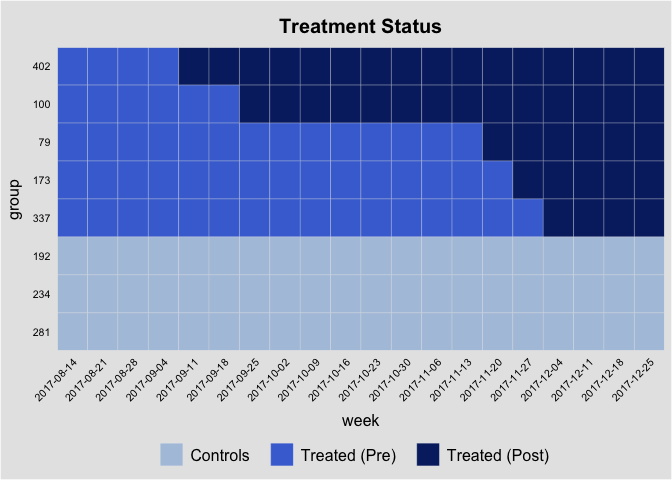

In [ ]:
did_data_staggered <- data.table::fread("https://raw.githubusercontent.com/WU-RDS/RMA2022/main/data/did_data_staggered.csv")
did_data_staggered$song_id <- as.character(did_data_staggered$song_id)
did_data_staggered$week <- as.Date(did_data_staggered$week)
did_data_staggered$week_num <- as.numeric(
    factor(
        did_data_staggered$week, 
        levels = sort(unique(did_data_staggered$week)), 
        labels = 1:length(unique(did_data_staggered$week))))
# data preparation
treated_ids <- unique(did_data_staggered[did_data_staggered$treated == 1, ]$song_id)
untreated_ids <- unique(did_data_staggered[did_data_staggered$treated == 0, ]$song_id)

library(panelView)

## Two-Way Fixed Effects?

$$
y_{i, t} = \tau_{did}\ \mathbb{1}(\text{treated}_{i, t}) + \gamma_t + \alpha_i + \epsilon_{i,t} 
$$

-   Ok **IF** $$
    \tau_{g, t} = \tau \text{ for all }g \text{ and } t
    $$

-   Otherwise: estimate separate $\tau_{g, t}$ for all $g$ and $t$ using
    only not (yet) treated units as controls

## Intuition

<figure>
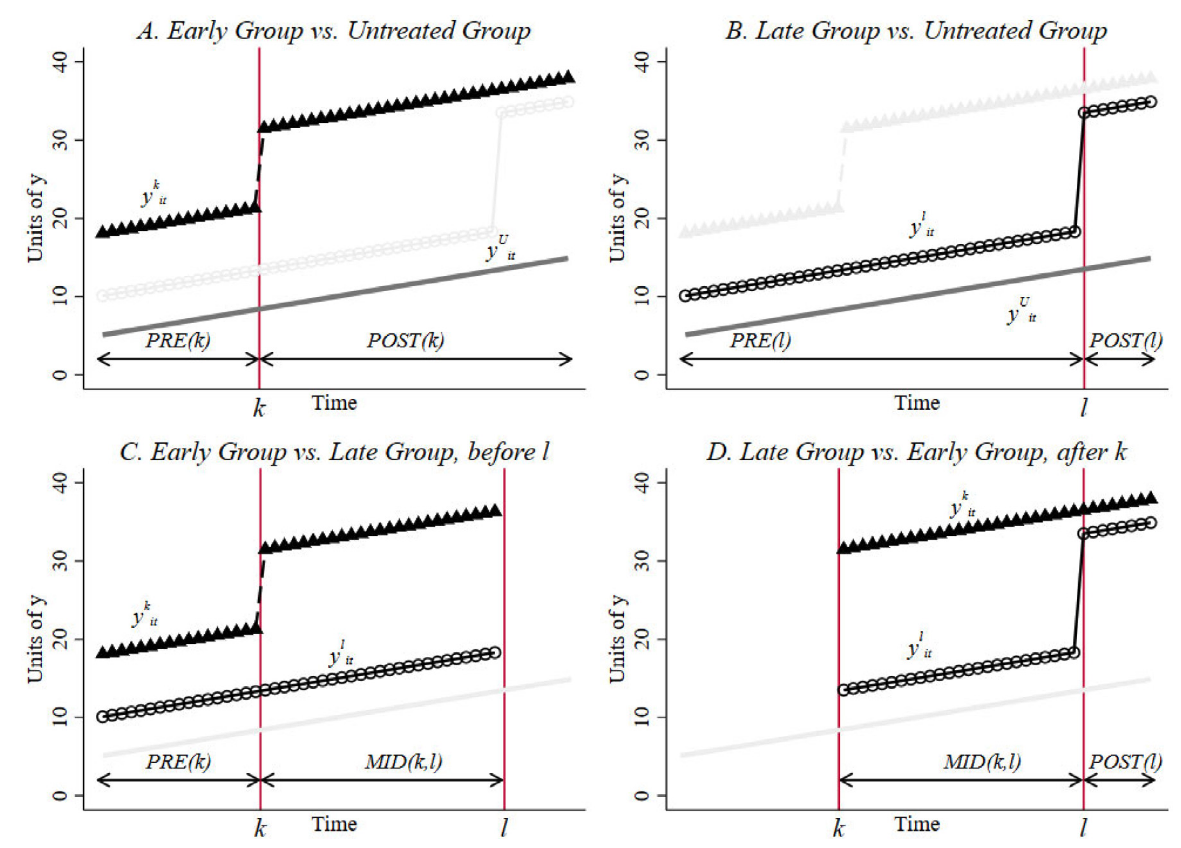
<figcaption aria-hidden="true"><span class="citation"
data-cites="goodman-baconDifferenceindifferencesVariationTreatment2021c">Goodman-Bacon
(2021)</span></figcaption>
</figure>

## Existing Extensions

-   Existing methods for multiple time periods (e.g., Callaway and
    Sant’Anna 2021) work well if the number of treated units in each
    group $g$ is “large” (\>5)
-   Focus on selecting “control group” correctly
    -   Loop over groups and times and select not (yet) treated as
        controls (Callaway and Sant’Anna 2021)
    -   Estimate large matrix of indicators (Sun and Abraham 2021)
-   Result: **Group Time Average Treatment Effect** $\tau_{g,t}$

## Implementation in R (Callaway and Sant’Anna 2021)

Warning in pre_process_did(yname = yname, tname = tname, idname = idname, : Be aware that there are some small groups in your dataset.
  Check groups: 15,16,17,18,19,20,22,24,25,26,27.

Warning in att_gt(yname = "log_streams", tname = "week_num", idname = "id", :
Not returning pre-test Wald statistic due to singular covariance matrix

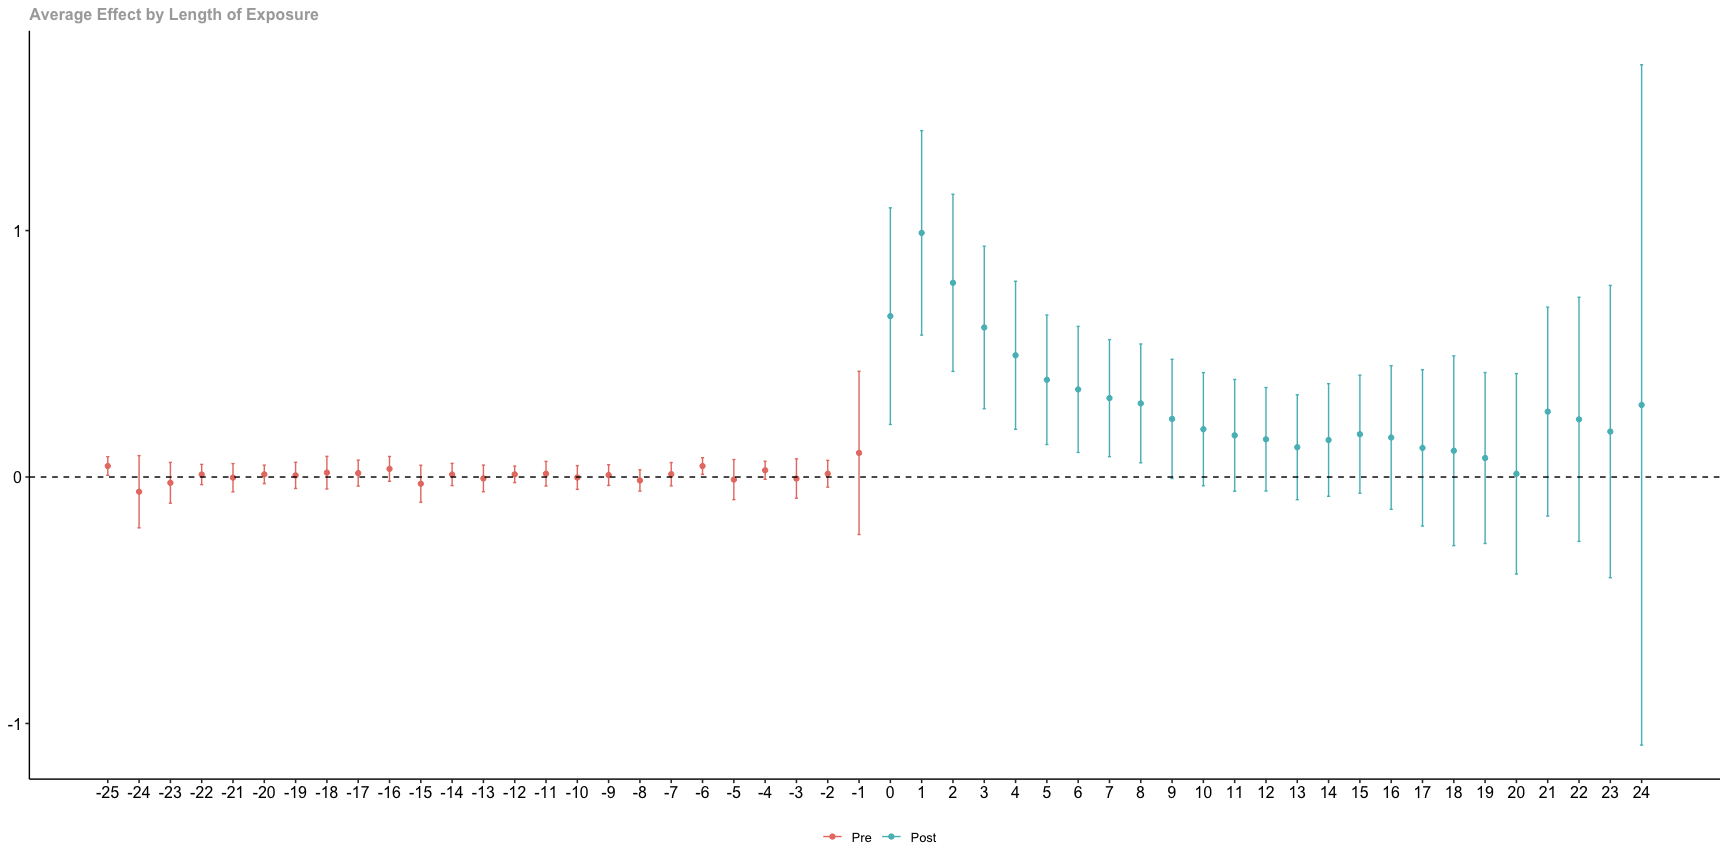

In [ ]:
did_data_staggered$log_streams <- log(did_data_staggered$streams+1)
# add first period treated
did_data_staggered_G <- did_data_staggered |>
  filter(treated == 1, week == treat_week) |>
  select(song_id, G = week_num)
did_data_staggered <- left_join(did_data_staggered,
                                did_data_staggered_G,
                                by = "song_id")
did_data_staggered$G <- coalesce(did_data_staggered$G, 0)
did_data_staggered$id <- as.numeric(did_data_staggered$song_id)

set.seed(123)
#increase bootstrap for reliability!
library(did)
mod.csa <- att_gt(yname = "log_streams",
       tname = "week_num",
       idname = "id",
       gname = "G",
       biters = 2000,
       data = did_data_staggered
)

## Implementation in R (Callaway and Sant’Anna 2021)

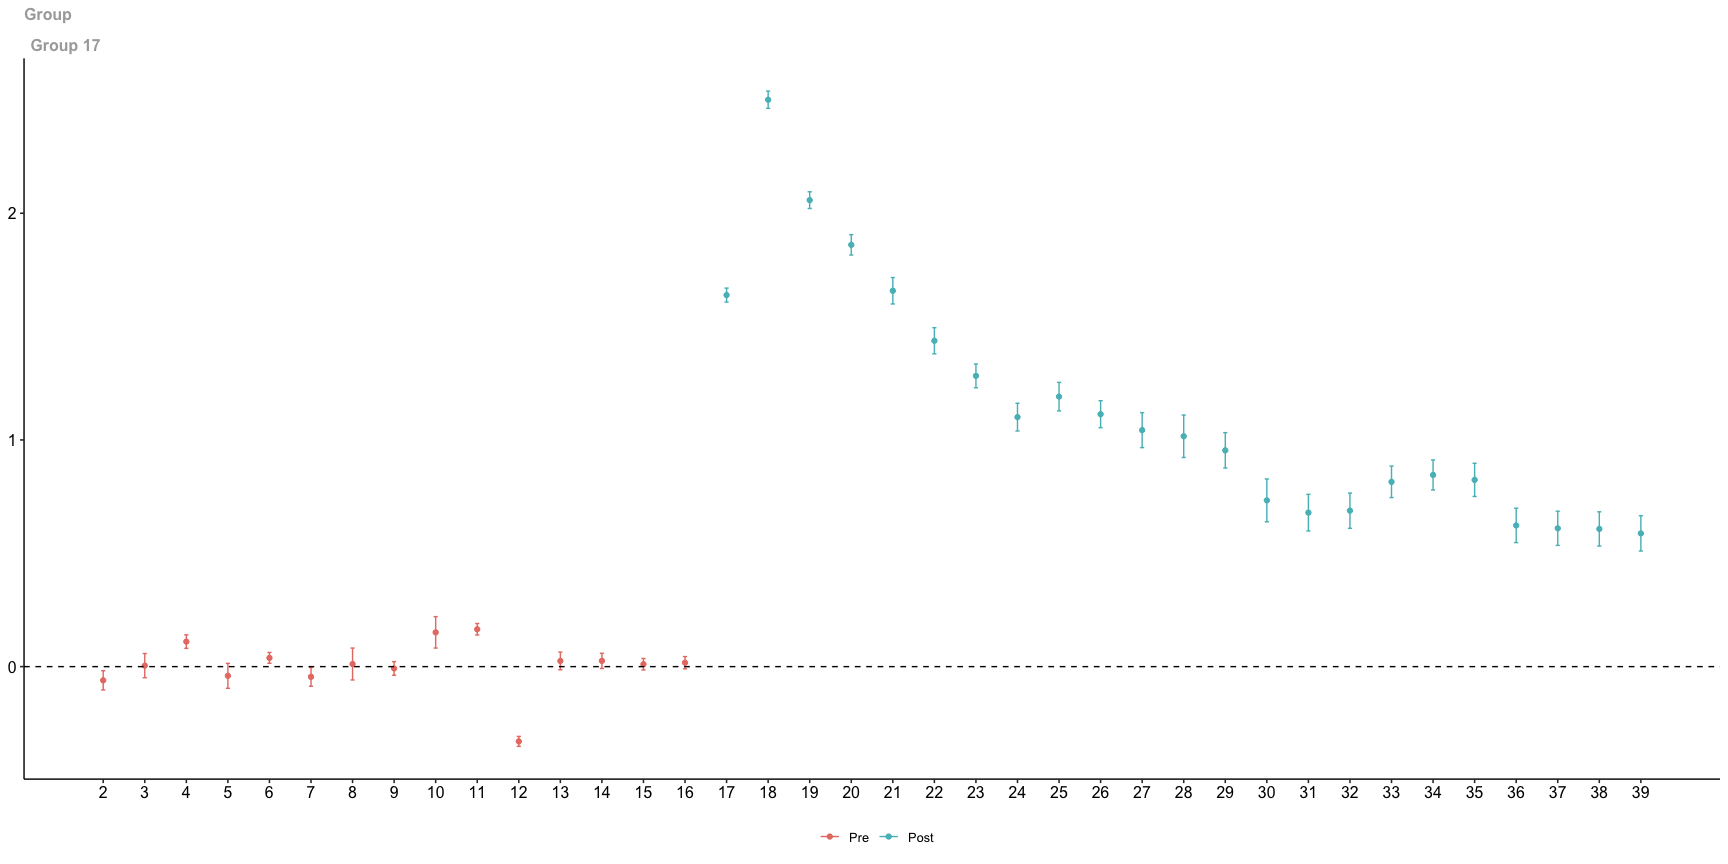

In [ ]:
ggdid(mod.csa, group = 17)

## Implementation in R (Sun and Abraham 2021)

Loading required package: ggplot2

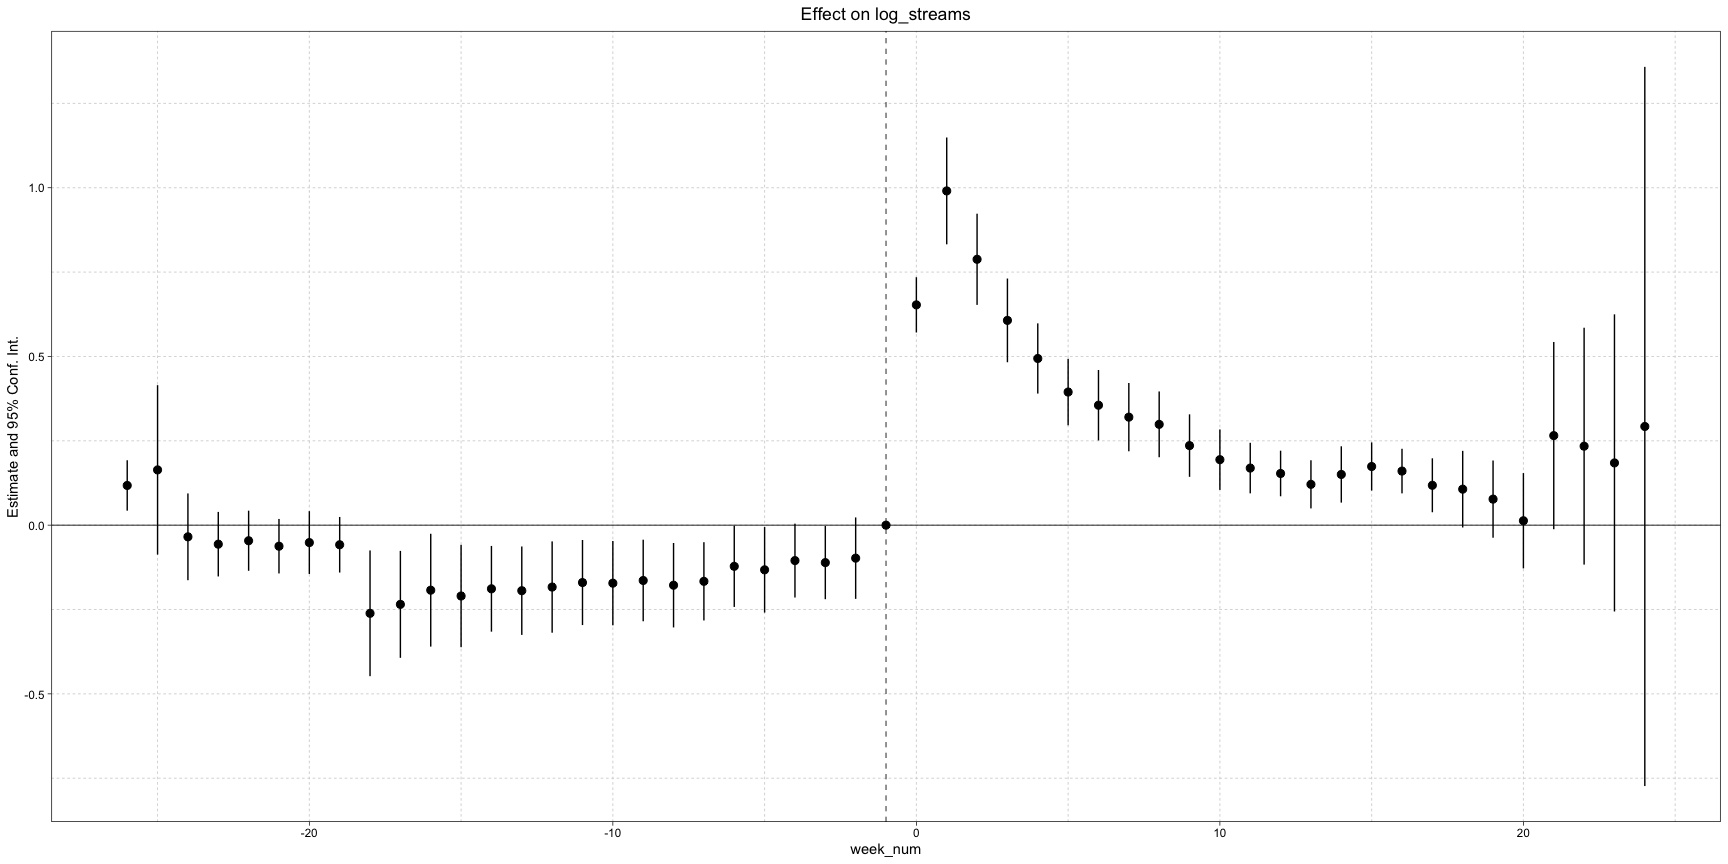

In [ ]:
library(ggiplot)

## References

Callaway, Brantly, and Pedro H. C. Sant’Anna. 2021.
“Difference-in-Differences with Multiple Time Periods.” *Journal of
Econometrics*, Themed issue: Treatment effect 1, 225 (2): 200–230.
<https://doi.org/10.1016/j.jeconom.2020.12.001>.

Goodman-Bacon, Andrew. 2021. “Difference-in-Differences with Variation
in Treatment Timing.” *Journal of Econometrics*, Themed issue: Treatment
effect 1, 225 (2): 254–77.
<https://doi.org/10.1016/j.jeconom.2021.03.014>.

Rubin, Donald B. 2005. “Causal Inference Using Potential Outcomes:
Design, Modeling, Decisions.” *Journal of the American Statistical
Association* 100 (469): 322–31. <https://www.jstor.org/stable/27590541>.

Sun, Liyang, and Sarah Abraham. 2021. “Estimating Dynamic Treatment
Effects in Event Studies with Heterogeneous Treatment Effects.” *Journal
of Econometrics*, Themed issue: Treatment effect 1, 225 (2): 175–99.
<https://doi.org/10.1016/j.jeconom.2020.09.006>.